In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

# Pregunta 1

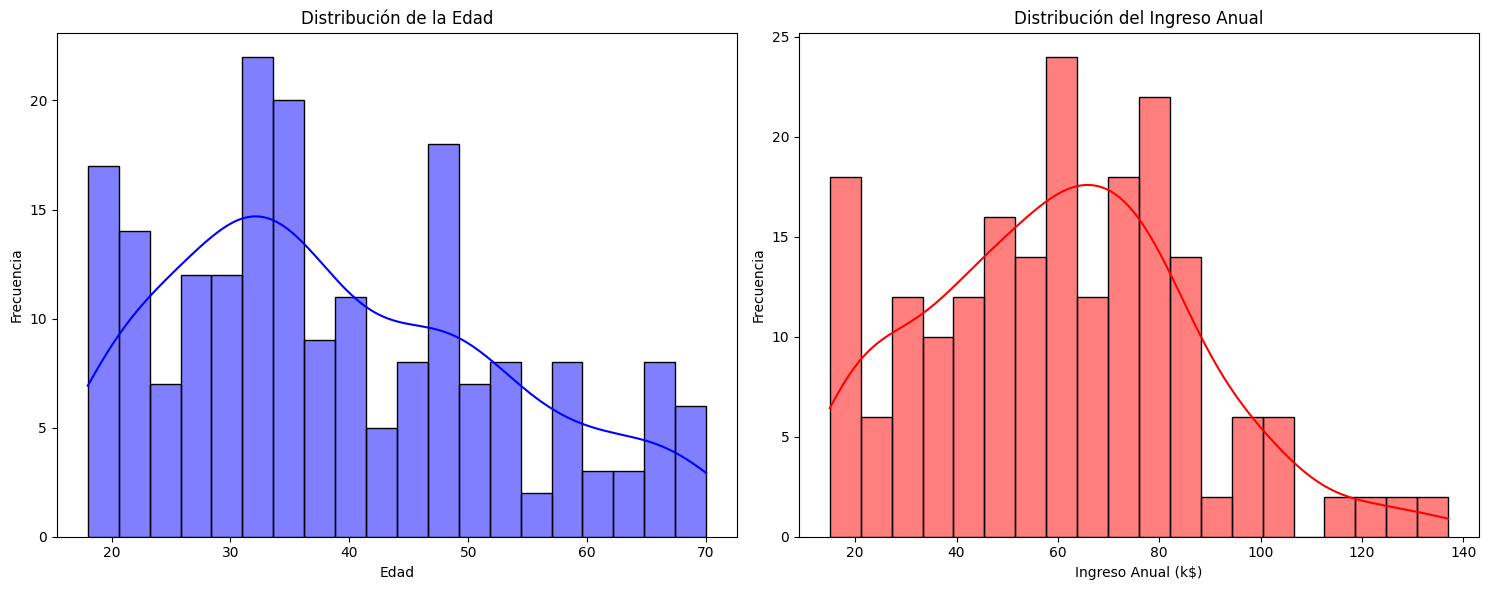

In [ ]:
#Visualizar la distribución de las variables
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='red')
plt.title('Distribución del Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
#Eliminar valores nulos
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
#Conversiónde la columna "Gender"
df = pd.get_dummies(df, columns=['Gender'])

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)
df.to_csv('/content/Mall_Customers.csv', index=False)
df_normalized

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148, -1.12815215,
         1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407, -1.12815215,
         1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298,  0.88640526,
        -0.88640526],
       ...,
       [ 1.68877065, -0.49160182,  2.49780745,  0.92395314, -1.12815215,
         1.12815215],
       [ 1.70609137, -0.49160182,  2.91767117, -1.25005425, -1.12815215,
         1.12815215],
       [ 1.7234121 , -0.6351352 ,  2.91767117,  1.27334719, -1.12815215,
         1.12815215]])

In [ ]:
print("Primeras filas del conjunto de datos:")
print(df.head())

Primeras filas del conjunto de datos:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0           1   19                  15                      39          False   
1           2   21                  15                      81          False   
2           3   20                  16                       6           True   
3           4   23                  16                      77           True   
4           5   31                  17                      40           True   

   Gender_Male  
0         True  
1         True  
2        False  
3        False  
4        False  


# Pregunta 2

In [ ]:
#Seleccionar características relevantes y realizar preprocesamiento si es necesario
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

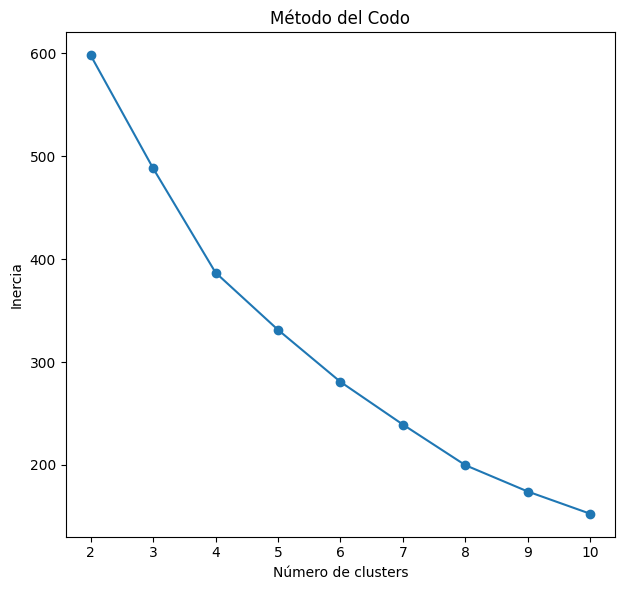

In [ ]:
#Buscar el número ideal de clusters utilizando el método del codo
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

#Visualizar el método del codo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

plt.tight_layout()
plt.show()

In [ ]:
optimal_k = 5 #Elcodo se encuentra en el 4 o 5, eligiré el 5
#Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
#Agregar las etiquetas de cluster al DataFrame original
df['Cluster'] = kmeans.labels_

# Interpretación de los resultados
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)
print("Centros de los clusters:")
print(cluster_centers)

print("\nTamaño de cada cluster:")
print(df['Cluster'].value_counts())


Centros de los clusters:
         Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0  57.214286           46.785714               38.714286            0.0   
1  48.109091           58.818182               34.781818            1.0   
2  28.536585           61.804878               71.097561            0.0   
3  28.438596           59.666667               67.684211            1.0   
4  38.473684           85.894737               14.210526            0.0   

    Gender_Male  
0  1.000000e+00  
1 -2.775558e-16  
2  1.000000e+00  
3 -3.330669e-16  
4  1.000000e+00  

Tamaño de cada cluster:
Cluster
3    57
1    55
2    41
0    28
4    19
Name: count, dtype: int64


## **Explicación e interpretación**

# *Centros de los Clusters:*
- Cluster 0: Este cluster tiene un centro con una edad promedio de aproximadamente 57 años, un ingreso anual promedio de alrededor de 46,785, y un puntaje de gasto promedio de aproximadamente 38.7. Todos los miembros de este cluster son hombres.
- Cluster 1: Los miembros de este cluster tienen una edad promedio de alrededor de 48 años, un ingreso anual promedio de aproximadamente 58,818, y un puntaje de gasto promedio de alrededor de 34.8. Todos los miembros de este cluster son mujeres.
- Cluster 2: Este cluster está caracterizado por una edad promedio de alrededor de 28.5 años, un ingreso anual promedio de aproximadamente 61,805, y un puntaje de gasto promedio de alrededor de 71.1. Todos los miembros de este cluster son mujeres.
- Cluster 3: Los miembros de este cluster tienen una edad promedio de alrededor de 28.4 años, un ingreso anual promedio de aproximadamente 59,667, y un puntaje de gasto promedio de alrededor de 67.7. Todos los miembros de este cluster son hombres.
- Cluster 4: Este cluster tiene un centro con una edad promedio de alrededor de 38.5 años, un ingreso anual promedio de aproximadamente 85,895, y un puntaje de gasto promedio de alrededor de 14.2. Todos los miembros de este cluster son mujeres.
# *Tamaño de cada Cluster:*
- El cluster 3 es el más grande con 57 miembros, seguido por el cluster 1 con 55 miembros.
- El cluster 2 tiene 41 miembros, mientras que el cluster 0 tiene 28 y el cluster 4 tiene 19.
# *Interpretación:*
Podemos observar una clara segmentación de los clientes en diferentes grupos según sus características demográficas y de gasto.
Los clusters muestran variaciones significativas en términos de edad, ingreso anual y puntaje de gasto, así como en la distribución de género.
Estos hallazgos podrían ser útiles para desarrollar estrategias de marketing dirigidas y personalizar servicios para diferentes segmentos de clientes. Por ejemplo, podríamos ofrecer promociones específicas o desarrollar programas de fidelización adaptados a las necesidades y preferencias de cada cluster. Además, podríamos ajustar nuestras estrategias de publicidad y comunicación para dirigirnos de manera efectiva a cada segmento.

# Pregunta 3

In [ ]:
X = df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: Ejecutar el algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN()

In [ ]:
# Etiquetas de los clusters asignados por DBSCAN (-1 representa ruido)
labels = dbscan.labels_

# Número de clusters encontrados (sin contar el ruido)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Número de puntos clasificados como ruido
n_noise_ = list(labels).count(-1)

# Paso 6: Interpretar los resultados obtenidos
print("Número estimado de clusters:", n_clusters_)
print("Número de puntos clasificados como ruido:", n_noise_)
print("Etiquetas de los clusters:", labels)

Número estimado de clusters: 7
Número de puntos clasificados como ruido: 145
Etiquetas de los clusters: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1  0 -1  0
 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  2  1
  1  1  2 -1  1 -1  2 -1  2 -1  1 -1 -1 -1 -1  2 -1 -1  2 -1 -1  1 -1  2
 -1 -1 -1 -1  2 -1  3  2 -1 -1 -1  2 -1 -1 -1  3 -1  2 -1  4 -1 -1  3  4
  2  3 -1  4  3  2 -1  4 -1  5 -1 -1 -1 -1 -1  5 -1  4  5  5 -1 -1 -1 -1
 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1 -1 -1  6 -1  6 -1 -1 -1  6 -1 -1 -1  6
 -1 -1 -1  6 -1 -1 -1 -1 -1  6 -1  6 -1  6 -1  6 -1  6 -1  6 -1 -1 -1  6
 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1 -1  6 -1  6 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


## **Explicación e interpretación**
Los resultados obtenidos del algoritmo DBSCAN indican lo siguiente:

- **Número estimado de clusters:** DBSCAN ha identificado 7 clusters en los datos.
- **Número de puntos clasificados como ruido:** Hay 145 puntos que han sido clasificados como ruido, es decir, puntos que no han sido asignados a ningún cluster.
- **Etiquetas de los clusters:** La lista de etiquetas muestra a qué cluster ha sido asignado cada punto de datos. Los valores negativos representan puntos clasificados como ruido (-1), mientras que los valores no negativos representan los clusters a los que pertenecen los puntos.

**Interpretación:**
- Los resultados muestran que DBSCAN ha identificado una estructura de clusterización en los datos, aunque también ha identificado una cantidad considerable de puntos como ruido. Esto sugiere que hay cierta complejidad en la distribución de los datos que no se ajusta fácilmente a clusters bien definidos.
- La presencia de puntos clasificados como ruido podría deberse a la naturaleza intrínsecamente ruidosa de los datos o a la falta de homogeneidad en la densidad de los puntos en algunas áreas del espacio de características.
- Los clusters identificados por DBSCAN pueden representar grupos de clientes con características similares en términos de edad, ingreso anual, puntaje de gasto y género. Sería útil realizar un análisis adicional para comprender las características distintivas de cada cluster y cómo podrían ser utilizadas para segmentar y dirigir estrategias de marketing específicas.

# Pregunta 4

Para comparar los resultados de los algoritmos K-Means (pregunta 2) y DBSCAN (pregunta 3), podemos analizar varios aspectos:

1. **Número de clusters:**
   - K-Means: Encontró un número específico de clusters (en este caso, 5).
   - DBSCAN: Determinó el número de clusters automáticamente en función de la densidad de los datos.

2. **Identificación de ruido:**
   - K-Means: No clasifica los puntos como ruido, ya que cada punto se asigna a un cluster incluso si es un outlier.
   - DBSCAN: Identifica los puntos que no pertenecen a ningún cluster como ruido, lo que puede ser útil para identificar outliers.

3. **Interpretación de los clusters:**
   - K-Means: Los clusters se definen por centroides y la distancia euclidiana, lo que puede ser efectivo para datos bien estructurados y con una forma globular.
   - DBSCAN: Es capaz de identificar clusters de cualquier forma y tamaño, lo que lo hace útil para datos con estructuras más complejas y no lineales.

4. **Flexibilidad:**
   - K-Means: Es menos flexible en términos de la forma y densidad de los clusters.
   - DBSCAN: Es más flexible y puede adaptarse a diferentes distribuciones de datos.

5. **Dependencia de parámetros:**
   - K-Means: Dependiente del número de clusters especificado por el usuario.
   - DBSCAN: Depende de los parámetros epsilon y min_samples, pero puede determinar el número de clusters automáticamente.

6. **Escalabilidad:**
   - K-Means: Más eficiente computacionalmente y escalable a grandes conjuntos de datos.
   - DBSCAN: Puede ser menos eficiente en grandes conjuntos de datos debido al cálculo de la matriz de distancia.

# *¿Cuál de los algoritmos considera hace un mejor clustering?, ¿Por qué?*
Consideraría DBSCAN como el mejor algoritmo de clustering en este caso. DBSCAN ofrece ventajas clave, como la capacidad de identificar clusters de cualquier forma y tamaño, así como la capacidad de detectar puntos atípicos como ruido. Esto lo hace especialmente útil cuando los datos tienen estructuras complejas y no se conoce el número de clusters a priori. Además, DBSCAN no requiere especificar el número de clusters de antemano, lo que lo hace más flexible en comparación con K-Means. Por lo tanto, en situaciones donde la forma y densidad de los clusters son desconocidas o variables, DBSCAN puede proporcionar resultados más robustos y representativos.